# Round 1 Exercise, Sales Analysis

#### Alexander Swanepoel, _University of Warwick, Computer Science MSc_

In [1]:
#Required Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nbconvert

# Data Preprocessing and Cleaning

### Feature Definitions: 
- Quote_week: The week the quote was done in.
- Direct_Site: Was the policy sold through our direct site as opposed to a price comparison site.
- Sale_Flag: Did the policy sell?
- Previous_Renewals: How many times the customer has previously renewed.
- Driver_Age Age of the driver.
- Driver_Years_Licence_Held: How many years the driver has held their licence.
- Annual_Mileage: Annual mileage.
- Vehicle_YearsOwned: Years the current driver has owned the vehicle.
- Vehicle_Age: Age of the vehicle.
- Payment_Instalments: Have they paid by instalments as opposed to a single lump sum?
- NCD: No claims discount.
- Net_Premium: Net rate provided by the underwriter.
- Main_Commission: Main commission made on the policy.
- Ancillary_Commission: Commission made through add-ons (like breakdown cover) and/or instalment income.
- Dataquality: Data quality

In [2]:
raw_data = pd.read_csv(r"C:\Users\alexs\Documents\2022_RawData.csv")
raw_data.head()

,Quote_week,Direct_Site,Sale_Flag,Previous_Renewals,Driver_Age,Driver_Years_Licence_Held,Annual_Mileage,Vehicle_YearsOwned,Vehicle_Age,Payment_Instalments,NCD,Net_Premium,Main_Commission,Ancillary_Commission,Dataquality
0,35,0,1,6.0,55.0,9.0,7999,10.0,15.0,0,9,180.79,27.71,0.00,OK
1,41,0,1,6.0,59.0,9.0,5500,7.0,16.0,1,9,268.64,254.08,88.05,OK
2,40,0,1,2.0,57.0,9.0,6999,8.0,9.0,0,9,131.24,29.07,3.14,OK
3,6,0,1,3.0,64.0,9.0,4999,3.0,4.0,0,9,257.14,35.35,19.18,OK
4,35,0,0,3.0,60.0,9.0,9999,6.0,14.0,1,6,619.80,36.07,129.09,OK


In [3]:
raw_data.describe()

,Quote_week,Direct_Site,Sale_Flag,Previous_Renewals,Driver_Age,Driver_Years_Licence_Held,Annual_Mileage,Vehicle_YearsOwned,Vehicle_Age,Payment_Instalments,NCD,Net_Premium,Main_Commission,Ancillary_Commission
count,10000.000000,10000.000000,10000.000000,9986.000000,9986.000000,9986.000000,10000.000000,9986.000000,9986.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,24.045400,0.015900,0.667300,3.401562,52.944923,8.910575,7597.931000,2.952133,10.510715,0.652600,7.971000,298.588794,101.648848,54.945372
std,13.400153,0.125095,0.471204,1.521133,11.956304,0.545675,3694.224632,2.917444,4.901221,0.476168,1.903345,177.115645,114.864566,43.865306
min,1.000000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1244.340000,0.000000
25%,13.000000,0.000000,0.000000,2.000000,45.000000,9.000000,5000.000000,1.000000,7.000000,0.000000,8.000000,189.537500,26.145000,19.180000
50%,24.000000,0.000000,1.000000,3.000000,54.000000,9.000000,7500.000000,2.000000,11.000000,1.000000,9.000000,250.245000,74.210000,48.950000
75%,35.000000,0.000000,1.000000,5.000000,62.000000,9.000000,10000.000000,4.000000,14.000000,1.000000,9.000000,355.137500,151.175000,79.435000
max,53.000000,1.000000,1.000000,7.000000,77.000000,9.000000,25000.000000,28.000000,33.000000,1.000000,9.000000,2770.350000,1037.680000,304.620000


In [7]:
#Raw Data Information
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Quote_week                 10000 non-null  int64  
 1   Direct_Site                10000 non-null  int64  
 2   Sale_Flag                  10000 non-null  int64  
 3   Previous_Renewals          9986 non-null   float64
 4   Driver_Age                 9986 non-null   float64
 5   Driver_Years_Licence_Held  9986 non-null   float64
 6   Annual_Mileage             10000 non-null  int64  
 7   Vehicle_YearsOwned         9986 non-null   float64
 8   Vehicle_Age                9986 non-null   float64
 9   Payment_Instalments        10000 non-null  int64  
 10  NCD                        10000 non-null  int64  
 11  Net_Premium                10000 non-null  float64
 12  Main_Commission            10000 non-null  float64
 13  Ancillary_Commission       10000 non-null  floa

- Dropping rows in dataquality containing the value 'unacceptable'

In [33]:
raw_data.drop(raw_data.index[raw_data['Dataquality'] == "Unacceptable"], axis=0, inplace = True)


In [31]:
#Raw Data Information
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9797 entries, 0 to 9998
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Quote_week                 9797 non-null   int64  
 1   Direct_Site                9797 non-null   int64  
 2   Sale_Flag                  9797 non-null   int64  
 3   Previous_Renewals          9783 non-null   float64
 4   Driver_Age                 9783 non-null   float64
 5   Driver_Years_Licence_Held  9783 non-null   float64
 6   Annual_Mileage             9797 non-null   int64  
 7   Vehicle_YearsOwned         9783 non-null   float64
 8   Vehicle_Age                9783 non-null   float64
 9   Payment_Instalments        9797 non-null   int64  
 10  NCD                        9797 non-null   int64  
 11  Net_Premium                9797 non-null   float64
 12  Main_Commission            9797 non-null   float64
 13  Ancillary_Commission       9797 non-null   float

## Null-checks

<AxesSubplot:>

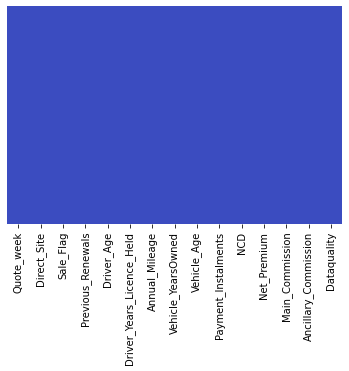

In [32]:
sns.heatmap(raw_data.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

From above, no distinct NaN values, however columns contain counter-intuitive zeros such that requires further explanation, however qualitatively the data appears to be pre-cleaned.

In [34]:
raw_data.isnull().sum()

Quote_week                    0
Direct_Site                   0
Sale_Flag                     0
Previous_Renewals            14
Driver_Age                   14
Driver_Years_Licence_Held    14
Annual_Mileage                0
Vehicle_YearsOwned           14
Vehicle_Age                  14
Payment_Instalments           0
NCD                           0
Net_Premium                   0
Main_Commission               0
Ancillary_Commission          0
Dataquality                   0
dtype: int64

### Removal of null values

In [35]:
nan_df = raw_data[raw_data.isna().any(axis=1)]
display(nan_df.head())

raw_data1 = raw_data.dropna(how='all')
raw_data1.head()

,Quote_week,Direct_Site,Sale_Flag,Previous_Renewals,Driver_Age,Driver_Years_Licence_Held,Annual_Mileage,Vehicle_YearsOwned,Vehicle_Age,Payment_Instalments,NCD,Net_Premium,Main_Commission,Ancillary_Commission,Dataquality
1682,8,0,0,NaN,NaN,NaN,0,NaN,NaN,0,9,154.78,58.56,0.00,Policy Missing Record
2588,8,0,0,NaN,NaN,NaN,0,NaN,NaN,1,6,158.76,68.84,27.49,Policy Missing Record
2715,8,0,0,NaN,NaN,NaN,0,NaN,NaN,1,1,432.80,58.38,77.14,Policy Missing Record
2987,8,0,0,NaN,NaN,NaN,0,NaN,NaN,1,9,231.57,136.93,115.73,Policy Missing Record
3031,8,0,0,NaN,NaN,NaN,0,NaN,NaN,1,9,181.45,-7.86,41.15,Policy Missing Record


,Quote_week,Direct_Site,Sale_Flag,Previous_Renewals,Driver_Age,Driver_Years_Licence_Held,Annual_Mileage,Vehicle_YearsOwned,Vehicle_Age,Payment_Instalments,NCD,Net_Premium,Main_Commission,Ancillary_Commission,Dataquality
0,35,0,1,6.0,55.0,9.0,7999,10.0,15.0,0,9,180.79,27.71,0.00,OK
1,41,0,1,6.0,59.0,9.0,5500,7.0,16.0,1,9,268.64,254.08,88.05,OK
2,40,0,1,2.0,57.0,9.0,6999,8.0,9.0,0,9,131.24,29.07,3.14,OK
3,6,0,1,3.0,64.0,9.0,4999,3.0,4.0,0,9,257.14,35.35,19.18,OK
4,35,0,0,3.0,60.0,9.0,9999,6.0,14.0,1,6,619.80,36.07,129.09,OK


In [39]:
raw_data1.shape

(9797, 15)

# Exploratory Data Analysis

## Question (1): What relationships exist between the variables provided?

#### Pearson Correlation Analysis 

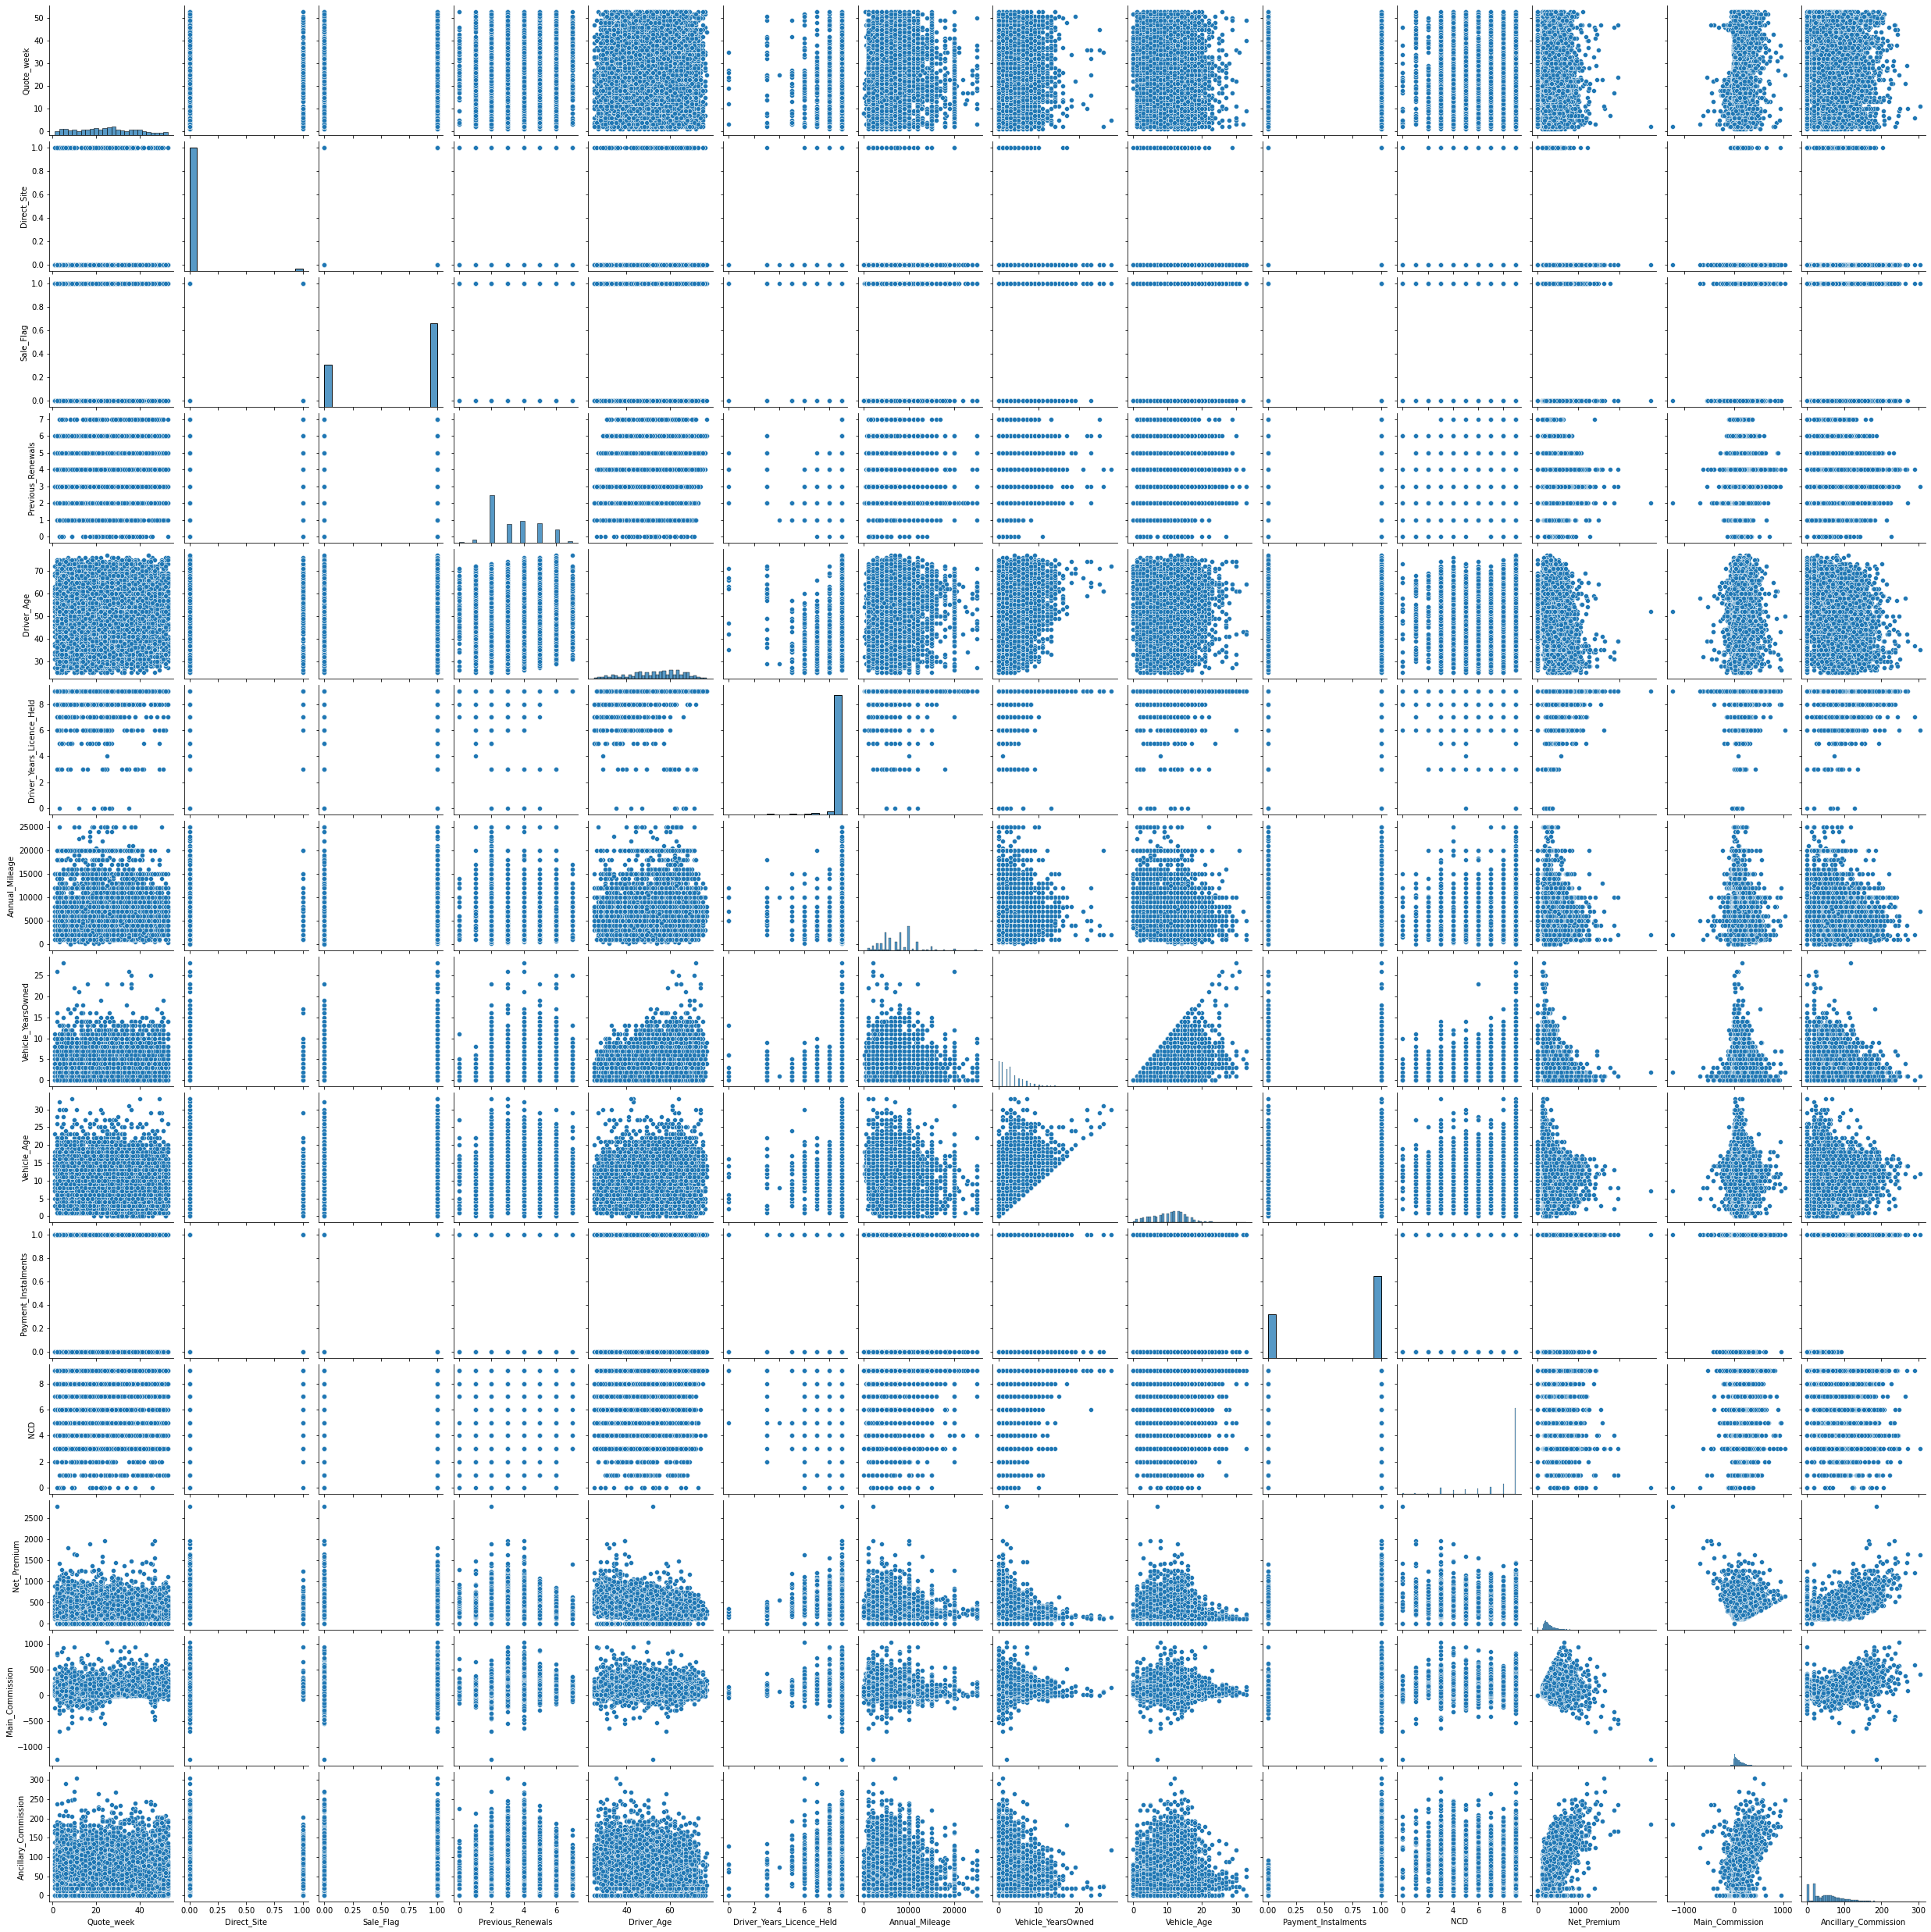

In [9]:
sns.pairplot(raw_data1)

From observation most features are categoric/binary; qualitatively we observe trends in the main commission vs. ancillary commission, payment installments and ancillary commission; some correlation between net premium and ancillary commission also. We observe basic distributive properties on the diagonal giving a good identifier as to the properties of the variable (i.e. numeric or categoric).  

In [13]:
MainCommission = raw_data["Main_Commission"]

<AxesSubplot:xlabel='Main_Commission', ylabel='Density'>

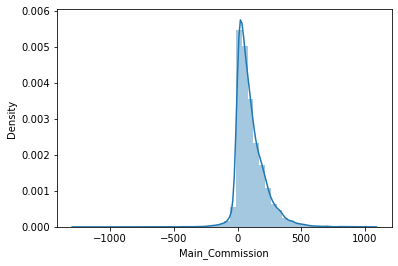

In [16]:
sns.distplot(MainCommission)

<AxesSubplot:>

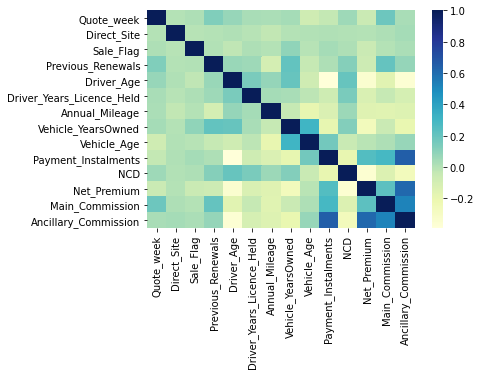

In [20]:
sns.heatmap(raw_data.corr(), cmap="YlGnBu")

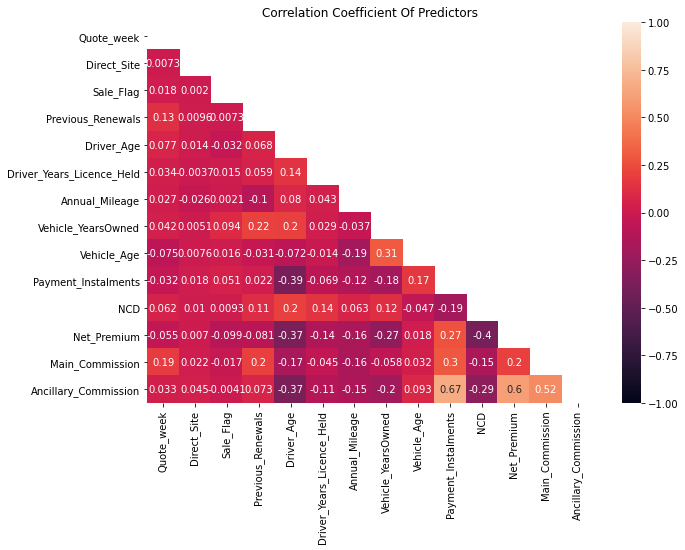

In [46]:
# set figure size
plt.figure(figsize=(10,7))
# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(raw_data1.corr(), dtype=bool))

# generate heatmap
sns.heatmap(raw_data1.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

Then, we note the slight Pearson correlations with respect to;

- Payment_Instalments vs. Driver_Age
- Net_Premium vs. Driver_Age
- Net_Premium vs. NCD
- Ancillary_Commission vs. Payment_Instalments 
- Ancillary_Commission vs. Net_Premium
- Ancillary_Commission vs. Vehicle Age
- Ancillary_Commission vs. Driver_Age
- Ancillary_Commission vs. Main_Commission



Pearson correlation shows minimal correlation between variables, potentially examine collinearity however variables with correlation have been noted. Moreover, we assume that any features with a correlation coefficient exceeding 0.80 are suspected of causing multicollinearity.

#### Collinearity Check

In [40]:
#Import VIF, Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
# the independent variables set
X = raw_data1[['Main_Commission','Ancillary_Commission','Payment_Instalments','Net_Premium']] 

#VIF Dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                feature       VIF
0       Main_Commission  2.402751
1  Ancillary_Commission  8.557051
2   Payment_Instalments  4.440710
3           Net_Premium  4.112982


We consider any VIF above the value of 5 to display large collinearity; Moreover, we remove a single variable before rexamining to avoid any information loss, as removing multiple variables can lead to this. 

In [43]:
#Variable Selection
X = raw_data1[['Main_Commission','Payment_Instalments','Net_Premium']] 
#VIF Dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

               feature       VIF
0      Main_Commission  1.986492
1  Payment_Instalments  2.904739
2          Net_Premium  2.788111


Now that the variance inflation factors are all within the acceptable range, the derived model will be more likely to yield statistically significant results. From this, we seek to drop Ancillary Commission as a suspected correlatory feature.

## Question (2): What factors influence our income? 

First, we proceed by defining income such that from the information available the given income is the sum of the net premium, main commission, and the ancillary commission. 

In [144]:
#Defining Revenue Per Individual Feature 
Income_features = ['Net_Premium', 'Main_Commission', 'Ancillary_Commission']

In [145]:
raw_data1['Income_Weekly'] = raw_data1[Income_features].sum(axis=1) 


In [54]:
raw_data1.head()

,Quote_week,Direct_Site,Sale_Flag,Previous_Renewals,Driver_Age,Driver_Years_Licence_Held,Annual_Mileage,Vehicle_YearsOwned,Vehicle_Age,Payment_Instalments,NCD,Net_Premium,Main_Commission,Ancillary_Commission,Dataquality,Revenue_Per_Person
0,35,0,1,6.0,55.0,9.0,7999,10.0,15.0,0,9,180.79,27.71,0.00,OK,208.50
1,41,0,1,6.0,59.0,9.0,5500,7.0,16.0,1,9,268.64,254.08,88.05,OK,610.77
2,40,0,1,2.0,57.0,9.0,6999,8.0,9.0,0,9,131.24,29.07,3.14,OK,163.45
3,6,0,1,3.0,64.0,9.0,4999,3.0,4.0,0,9,257.14,35.35,19.18,OK,311.67
4,35,0,0,3.0,60.0,9.0,9999,6.0,14.0,1,6,619.80,36.07,129.09,OK,784.96


In [58]:
raw_data1. drop('Revenue_Per_Person', axis=1, inplace=True) 

In [146]:
raw_data1.groupby(['Quote_week']).sum()

,Direct_Site,Sale_Flag,Previous_Renewals,Driver_Age,Driver_Years_Licence_Held,Annual_Mileage,Vehicle_YearsOwned,Vehicle_Age,Payment_Instalments,NCD,Net_Premium,Main_Commission,Ancillary_Commission,split,Income_Weekly
Quote_week,,,,,,,,,,,,,,,
1,1,23,130.0,1898.0,332.0,261185,148.0,459.0,28,298,12272.79,5448.61,2507.30,1.601334,20228.70
2,6,144,825.0,11836.0,2049.0,1641419,725.0,2658.0,178,1816,81242.84,25645.18,15869.36,-0.932089,122757.38
3,7,168,881.0,12978.0,2250.0,1833412,646.0,2792.0,179,1989,85664.18,21629.90,15005.46,0.043684,122299.54
4,4,142,760.0,11242.0,1912.0,1607820,612.0,2418.0,158,1672,73016.53,22444.74,14178.78,7.100558,109640.05
5,6,146,788.0,11700.0,2040.0,1621120,704.0,2545.0,152,1780,71595.87,21354.04,13117.03,-13.399021,106066.94
6,2,161,864.0,13329.0,2312.0,1830030,777.0,2923.0,185,2083,79788.72,25113.18,14950.00,-5.161480,119851.90
7,3,135,674.0,10455.0,1801.0,1532024,656.0,2195.0,140,1638,66841.50,16788.52,11828.65,-0.160657,95458.67
8,1,109,512.0,7828.0,1355.0,1120394,398.0,1642.0,120,1276,54176.31,13668.42,9725.56,14.985166,77570.29
9,2,119,591.0,9809.0,1665.0,1385752,431.0,1993.0,125,1435,58625.13,13905.66,10227.66,19.449613,82758.45


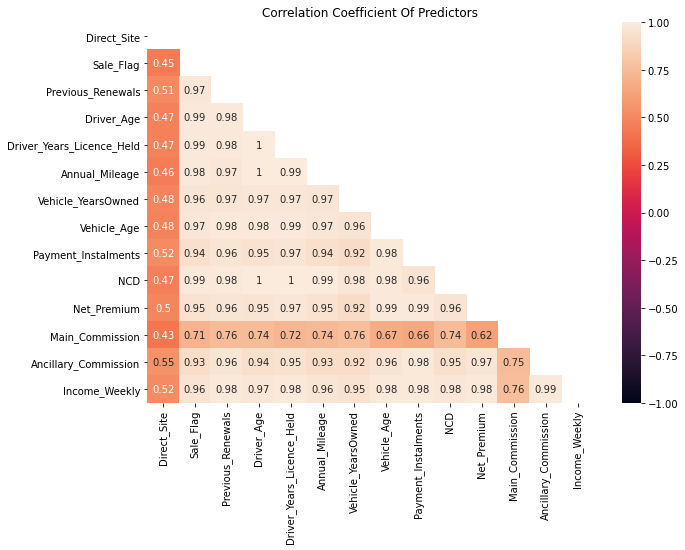

In [90]:
# set figure size
plt.figure(figsize=(10,7))
# Generate a mask to onlyshow the bottom triangle
mask = np.triu(np.ones_like(weekly_data.corr(), dtype=bool))

# generate heatmap

weekly_data = raw_data1.groupby(['Quote_week']).sum()
sns.heatmap(weekly_data.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show()

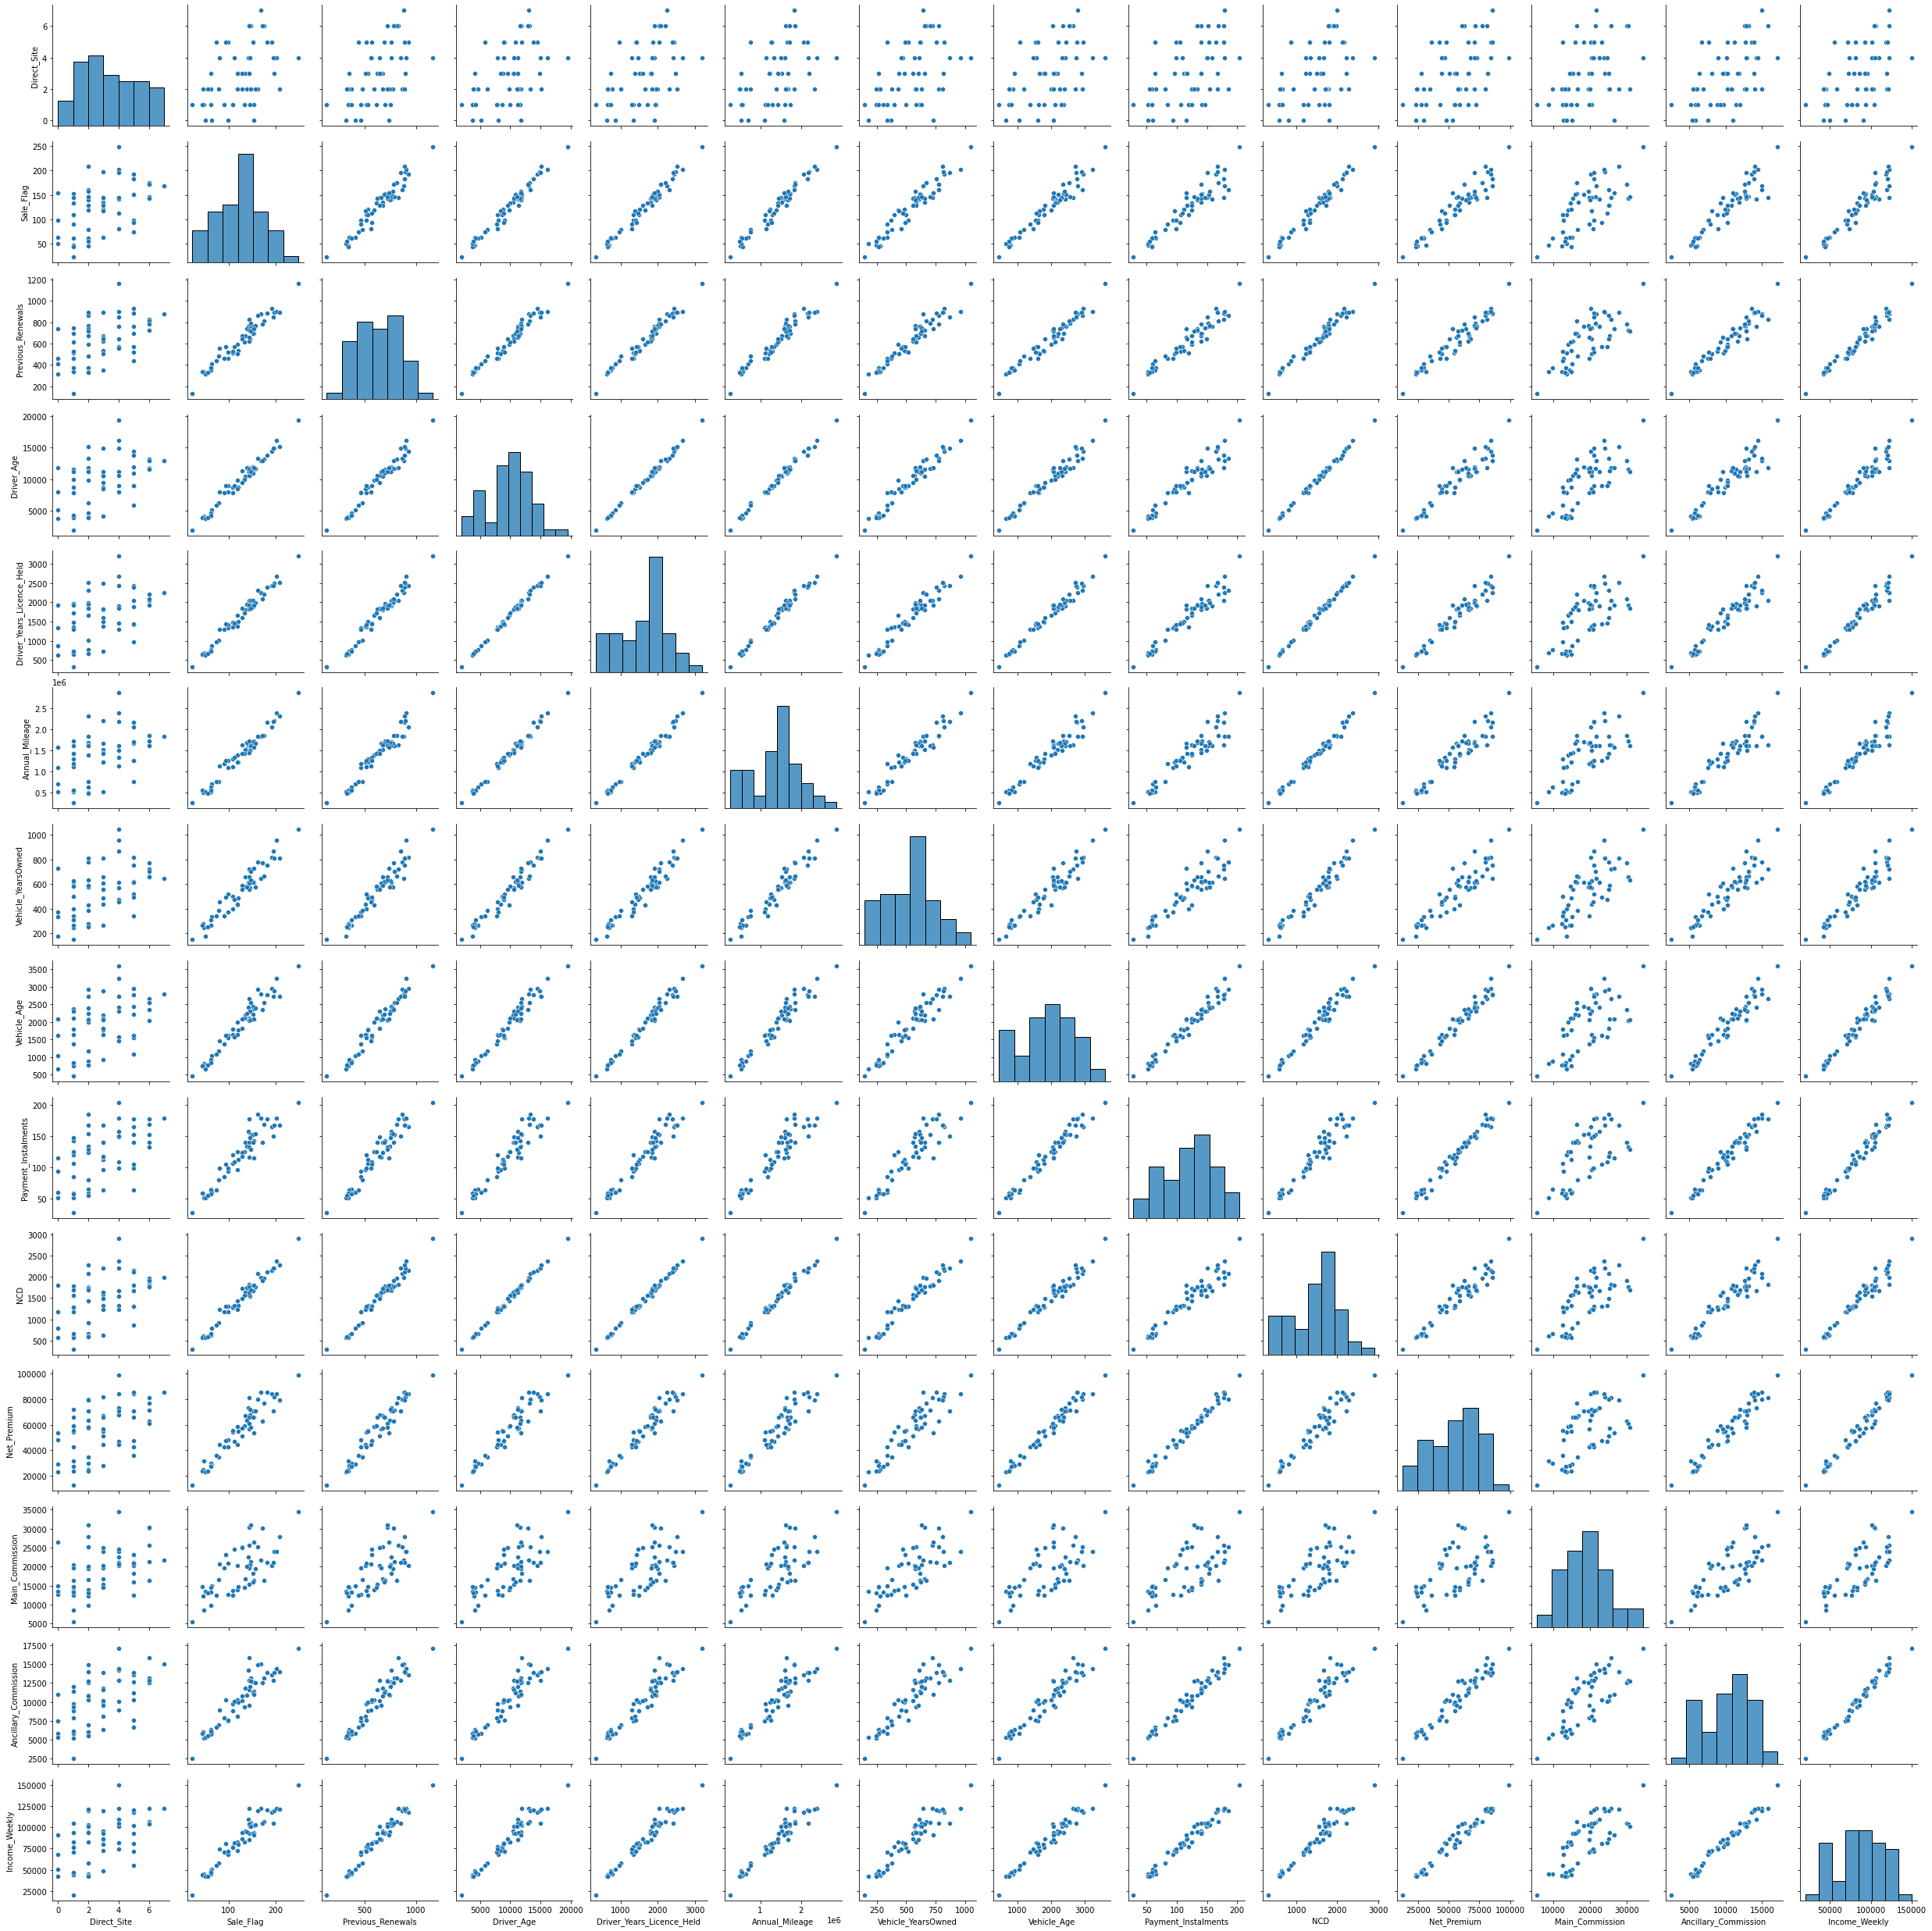

In [99]:
sns.pairplot(weekly_data)

- Unfortunately the Pearson correlation is trivial with respect to feature relationships as all variables show a high degree of correlation. Thus we will explore the factors manually.

In [147]:
y = raw_data1.groupby(['Quote_week']).sum()['Income_Weekly']
IncomePlot = pd.DataFrame(y, columns=["X", "A", "B", "C"])

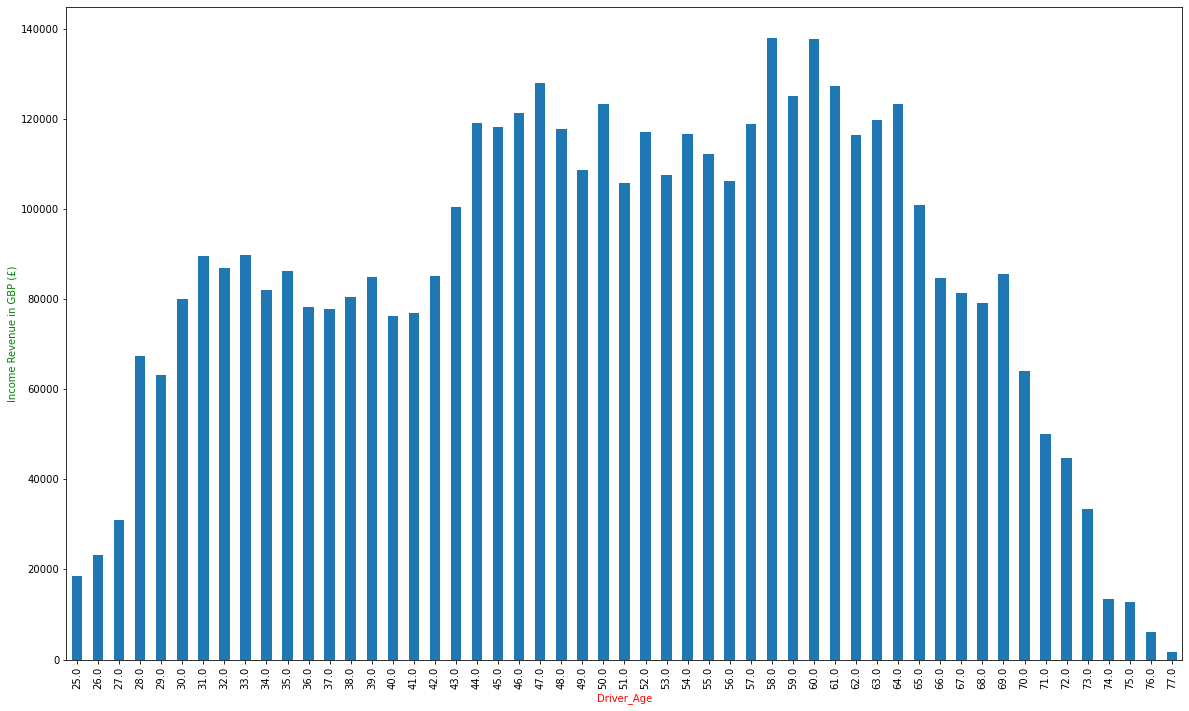

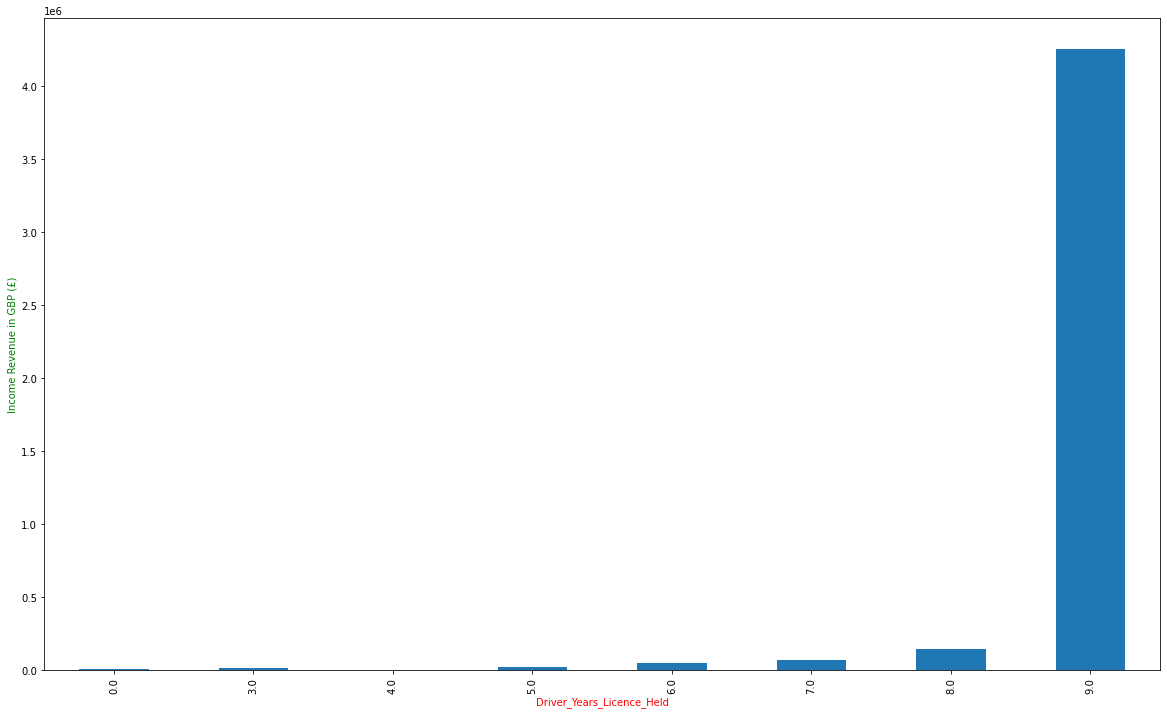

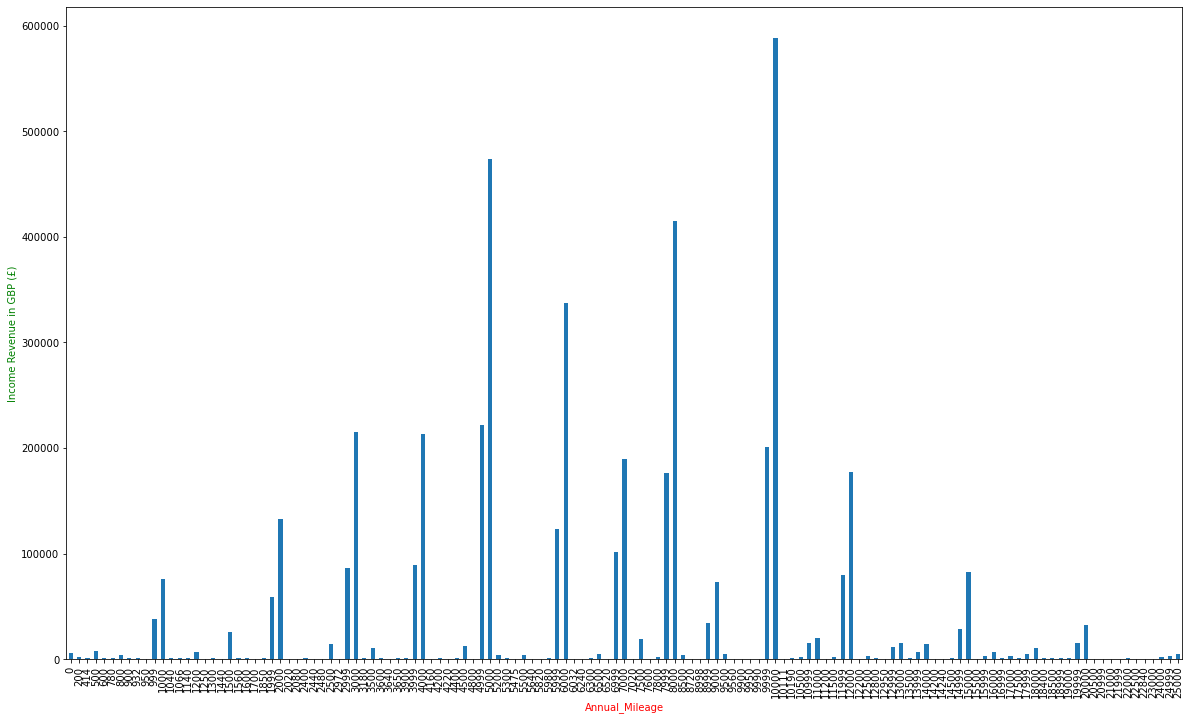

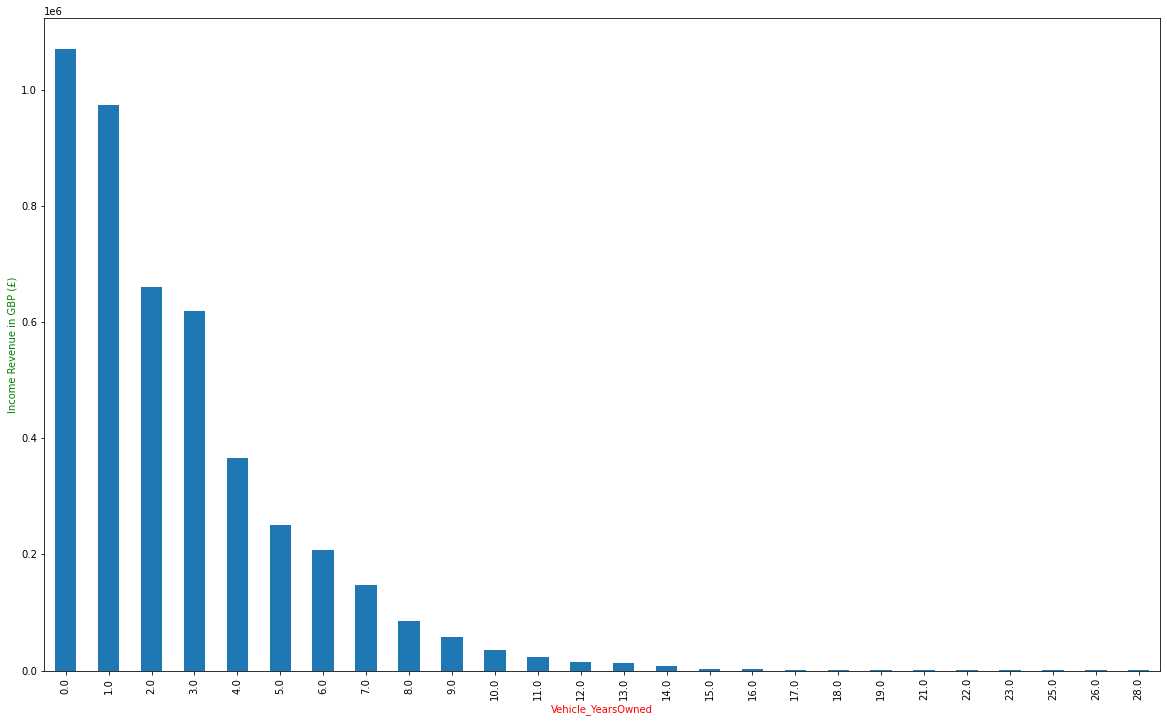

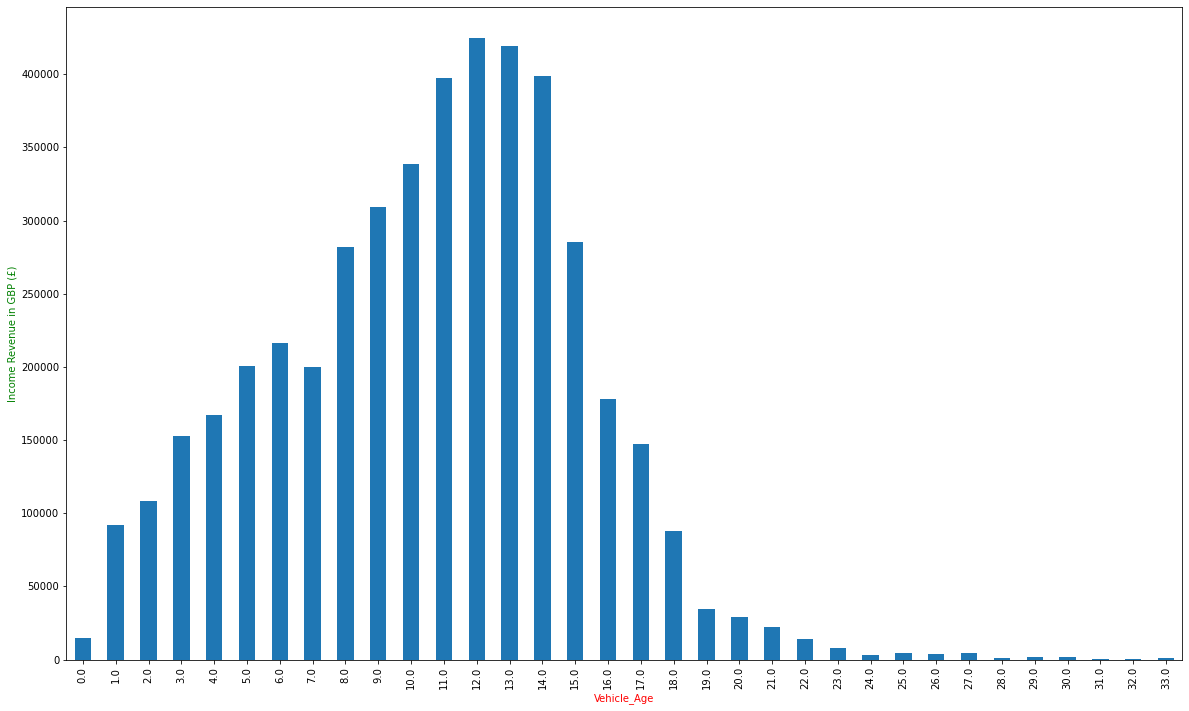

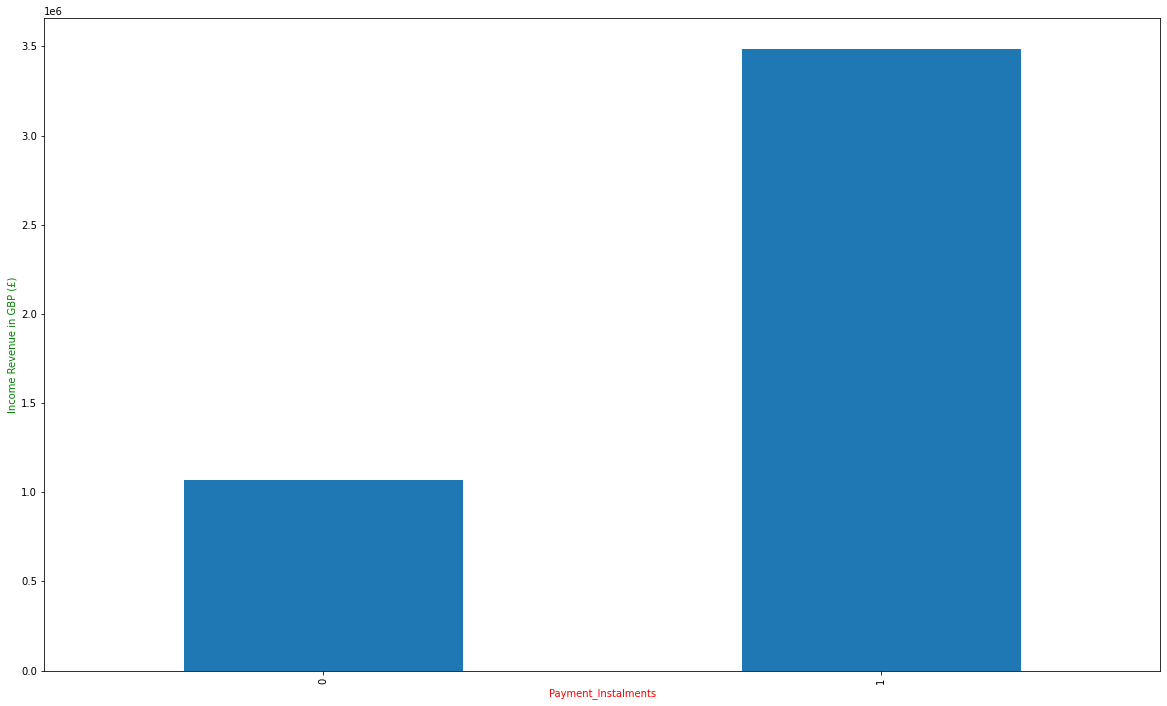

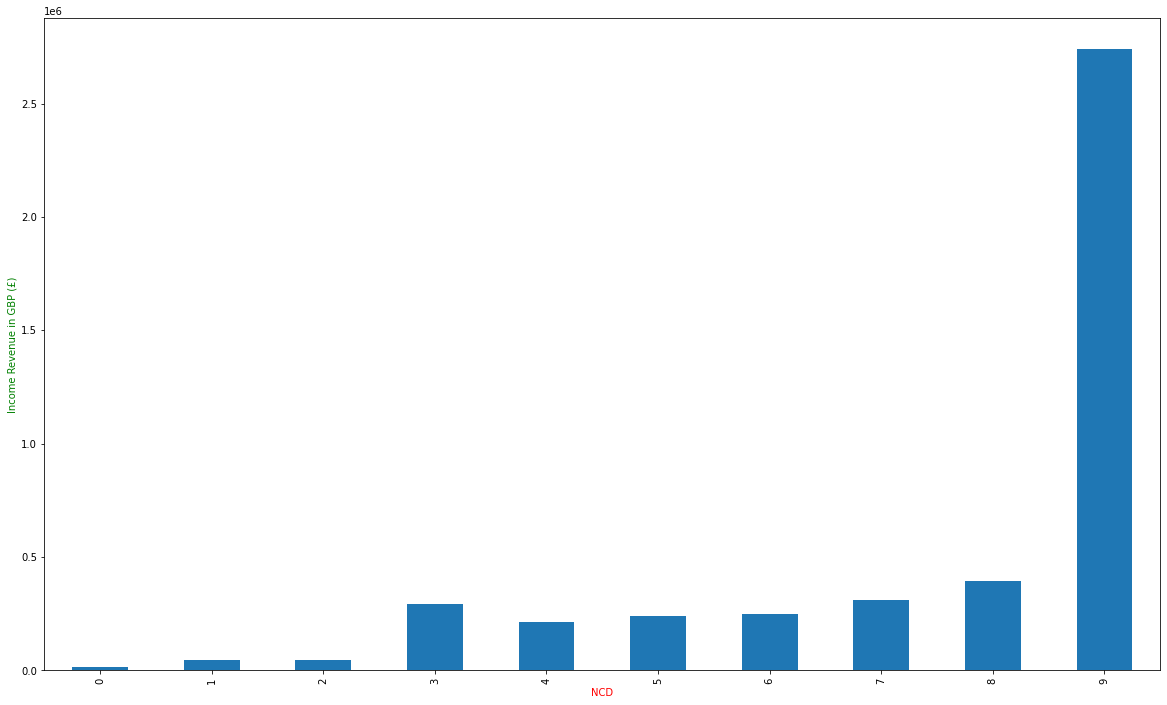

In [106]:
Features = ['Driver_Age','Driver_Years_Licence_Held','Annual_Mileage','Vehicle_YearsOwned','Vehicle_Age','Payment_Instalments','NCD']
for i in Features:

    fig, ax = plt.subplots(figsize=(20,12))    
    ax.set_xlabel('Week Number',color='r')
    ax.set_ylabel('Income Revenue in GBP (£)', color='g')
    raw_data1.groupby([i]).sum()['Income_Weekly'].plot.bar(ax=ax)

With respect to the graphical representation of the data above, we have not included features such as Net_Premium, Main_Commission and Ancillary_Commission as they have been included in the definition of Weekly_Income and would be circular in recurrence. Then we proceed, Driver_Age displays a normal distribution behaviour with some given noise, therefore will not be considered interesting. Driver_Years_LicenseHeld shows no discernible trend, with a spike at 9 years. Annual Mileage also displays a normally distributive trend.
Moreover, the charts with distributions of interest and show promising indications with respect to income are as follows:

- Driver_Age displays a normal distribution behaviour with some given noise, therefore will not be considered interesting 
- Vehicle_YearsOwned shows a distinct inverse $y=\frac{1}{x}$ in the positive domain relationship such that as the age of the vehicle increases, the income provided from the respective owners decreases.
- Vehicle_Age also resembles a negative skew normal distribution such that the median, mode, and mean are easily identifiable. 
- NCD may also pose itself to be interesting, with a very slight trend however the peak at 9 may also be an anomoly and would require further exploration.

## Question (3): Have there been any changes to our income over the course of the year? 

In [84]:
"""
Mean and Standard Deviation Calculations for Error Bars,
Standard Error is given such that Standard Error is + or - 2 Standard Deviations
"""

Income_weekly_mean = np.mean(raw_data1.groupby(['Quote_week']).sum()['Income_Weekly'])
Income_weekly_SD = np.std(raw_data1.groupby(['Quote_week']).sum()['Income_Weekly'])

<AxesSubplot:xlabel='Quote_week', ylabel='Income Revenue in GBP (£)'>

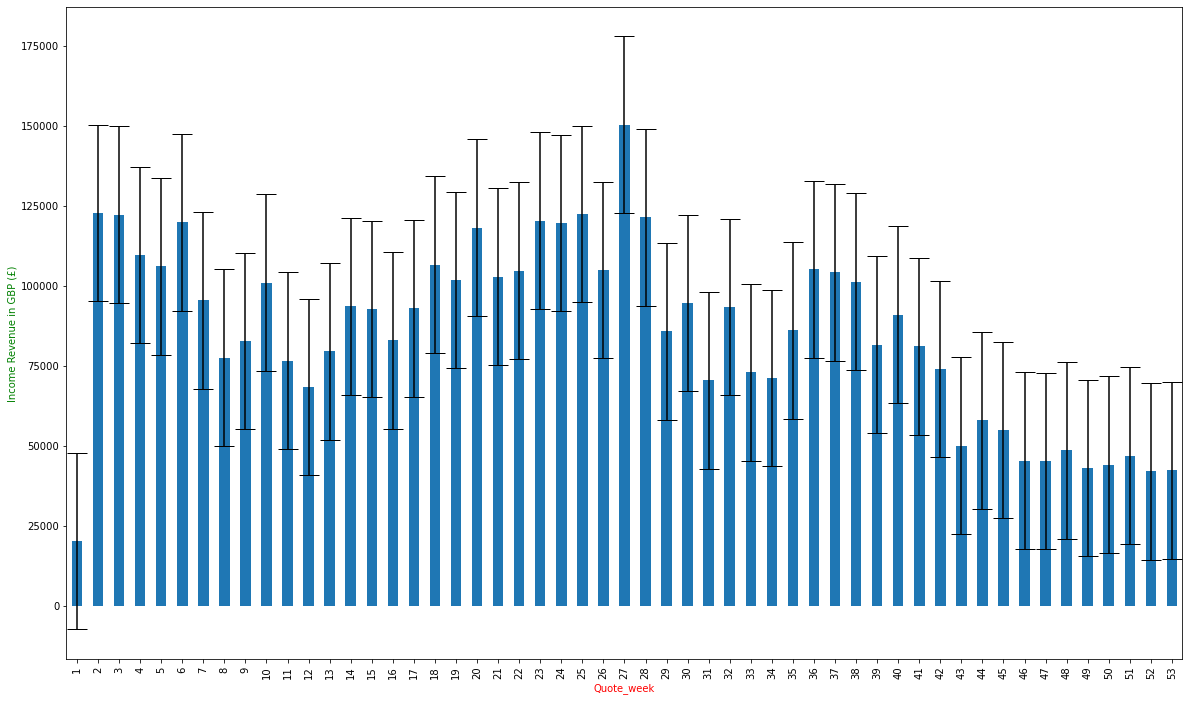

In [148]:
import matplotlib.pyplot as plt
error = Income_weekly_SD

fig, ax = plt.subplots(figsize=(20,12))


ax.set_xlabel('Week Number',color='r')
ax.set_ylabel('Income Revenue in GBP (£)', color='g')
raw_data1.groupby(['Quote_week']).sum()['Income_Weekly'].plot.bar(ax=ax, yerr=error, ecolor = 'black', capsize=10)

- From above, we are able to seek large fluctuation in the changes to income with respect to pound sterling amount week-to-week. The local maxima of said income would be week 27, speculatively in July; a local minima occuring in week 1 of the year, spectulatively speaking this may be due to the New-Year being a peak-holiday time for individuals therefore by implication they are not considering utility bills. 

- However, we note that statistically speaking the results are not significant as there is large overlap between the standard error bars given above, this indicates we would require more data such that the sample size is sufficient to identify a trend.

## Question (4): Model Implementation

In [262]:
"""
Defining label features, isolated Income_Weekly as the label, 
dataframe manipulation as given shape was peculiar.

"""

#Isolating Target Variable
y_c = raw_data1.loc[:,'Income_Weekly']
#Converting to pandas dataframe
y_col_test = pd.DataFrame(y_c)
#Converting to numpyarray to flatten
y_col_np = pd.DataFrame(y_col_test).to_numpy()
#y_col_np

#Re-shaping to isolate single column
y_col_test2 = y_col_np.reshape(y_col_np.shape[0:])
#y_col_test2.shape

#Flattening
y_col_test3 = y_col_np.ravel()
#y_col_test3.shape

array([[208.5 ],
       [610.77],
       [163.45],
       ...,
       [420.49],
       [981.63],
       [485.17]])

In [221]:
"""
Defined Unused Variables
"""
#y_column.T
#Y_col = y_column.T
#Y_col.drop('Quote_week ', axis=1, inplace=True)
#_col1 = Y_col.loc[:,'Income_Weekly']
#Y_Column = pd.DataFrame(Y_col1)

In [274]:
from sklearn.model_selection import train_test_split

list_x_cols = list(raw_data1.columns[1:-2])
y_col = [raw_data1.groupby(['Quote_week']).sum()['Income_Weekly']]


X_train, X_test, y_train, y_test = train_test_split(df[list_x_cols], y_col_test3,test_size=0.2)

In [248]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV

""" XGBoost is an implementation of gradient boosted decision trees"""
""" For documentation please see https://xgboost.readthedocs.io/en/stable/"""
""" Regressive Models such as Linear Regression, Random Forest Regression and XGBoost are 
well known in the machine learning domain to be of useful application to income
forecasting and time-series analysis for a plethora of reasons, for completeness we 
implement XGBOOST as my algorithm of choice. """

classifier=xgboost.XGBRegressor()
regressor=xgboost.XGBRegressor() 

#XGBRegressor has a large amount of input parameters and will require a random search CV

In [249]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [250]:
## Hyper Parameter Optimization
#

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [251]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [275]:
random_cv.fit(X_train,y_train.T)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[13:57:38] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   param

In [276]:
"""
Parameter Optimsation via Best Estimator built-in function
"""
random_cv.best_estimator_

XGBRegressor(base_score=0.75, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=-1,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_delta_step=None, max_depth=2,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=1500, n_jobs=12, num_parallel_tree=None,
             predictor=None, random_state=0, reg_alpha=0, reg_lambda=0,
             scale_pos_weight=1, subsample=None, tree_method=None,
             validate_parameters=1, verbosity=None)

In [278]:
#Simple Parameter Optimised Implementation from above

regressor = xgboost.XGBRegressor(base_score=0.75, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=-1,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_delta_step=None, max_depth=2,
             min_child_weight=3, monotone_constraints=None,
             n_estimators=1500, n_jobs=12, num_parallel_tree=None,
             predictor=None, random_state=0, reg_alpha=0, reg_lambda=0,
             scale_pos_weight=1, subsample=None, tree_method=None,
             validate_parameters=1, verbosity=None)

In [279]:
regressor.fit(X_train,y_train)

[14:06:55] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.75, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=-1,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_delta_step=None, max_depth=2,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=1500, n_jobs=12, num_parallel_tree=None,
             predictor=None, random_state=0, reg_alpha=0, reg_lambda=0,
             scale_pos_weight=1, subsample=None, tree_method=None,
             validate_parameters=1, verbosity=None)

In [280]:
y_pred=regressor.predict(X_test)

In [287]:
y_pred

array([556.80664, 466.133  , 666.7784 , ..., 371.9666 , 232.49596,
       491.88718], dtype=float32)

### Model Evaluation

- Evaluation where regressive model scoring such that we have a complete compartive set of evaluation statistics.

In [308]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, regressor.predict(X_test)))
mae = mean_absolute_error(y_test, regressor.predict(X_test))
r2 = r2_score(y_test, regressor.predict(X_test))
mse = mean_squared_error(y_test, regressor.predict(X_test))

print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print(f"The Root Mean Squared Error (RMSE) on test set: {rmse}")
print(f"The Mean Absolute Error (MSE) on test set: {mae}")
print(f"The R Squared Error (MSE) on test set: {r2}")

The mean squared error (MSE) on test set: 0.1546
The Root Mean Squared Error (RMSE) on test set: 0.3932469797962736
The Mean Absolute Error (MSE) on test set: 0.22558766049754783
The R Squared Error (MSE) on test set: 0.9999976082767372


In [332]:
raw_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9797 entries, 0 to 9998
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Quote_week                 9797 non-null   int64  
 1   Direct_Site                9797 non-null   int64  
 2   Sale_Flag                  9797 non-null   int64  
 3   Previous_Renewals          9783 non-null   float64
 4   Driver_Age                 9783 non-null   float64
 5   Driver_Years_Licence_Held  9783 non-null   float64
 6   Annual_Mileage             9797 non-null   int64  
 7   Vehicle_YearsOwned         9783 non-null   float64
 8   Vehicle_Age                9783 non-null   float64
 9   Payment_Instalments        9797 non-null   int64  
 10  NCD                        9797 non-null   int64  
 11  Net_Premium                9797 non-null   float64
 12  Main_Commission            9797 non-null   float64
 13  Ancillary_Commission       9797 non-null   float

C:\Users\alexs\anaconda3\envs\RPythonEnv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\alexs\anaconda3\envs\RPythonEnv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


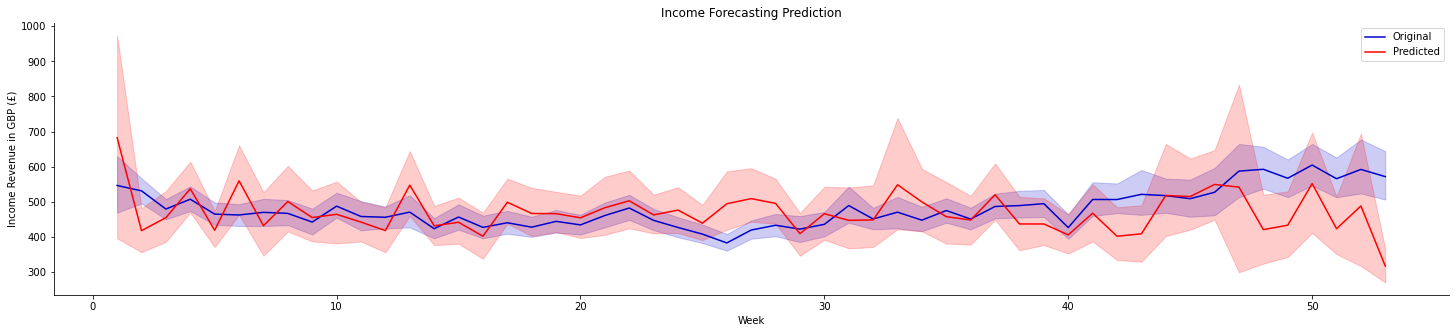

In [337]:
fig, ax = plt.subplots(figsize=(25,5))
predicted_instances = range(1,1961)
y_pred_ser = pd.Series(y_pred)

sns.lineplot(raw_data1.loc[:,'Quote_week'], raw_data1.loc[:,'Income_Weekly'], ax=ax, 
                 label='Original', color='mediumblue')
sns.lineplot(raw_data1.loc[:,'Quote_week'], y_pred_ser, ax=ax, 
                 label='Predicted', color='Red')
    
ax.set(xlabel = "Week",
           ylabel = "Income Revenue in GBP (£)",
           title = f"Income Forecasting Prediction")
    
ax.legend()

sns.despine()

## Conclusion

As observed from the graphical representation above, as well as the evaluation statistics below: 

- Mean Squared Error (MSE) on test set: 0.1546
- Root Mean Squared Error (RMSE) on test set: 0.3932469797962736
- Mean Absolute Error (MAE) on test set: 0.22558766049754783
- $R^2$ Error ($R^2$) on test set: 0.9999976082767372

From a single instantiation with no training, the model performance is adequate such that there is a large overlap of correct predictions, however the outlying results from a qualitative perspective are significant, for example week 52 shows a large differential in prediction. We postulate the size of the dataset as well as the undertuned model are large contributors to the discrepancy. However, with more training as well as a larger dataset the model has capacity to improve greatly. 

In [ ]:
#Model Save via. Pickle

import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))